#### Imports

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

Load Dataset

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [6]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

Define Model

In [8]:
model = Sequential([ 
    Flatten(input_shape=(28, 28)),       # Flatten the 28x28 images into 784-dimensional vectors 
    Dense(16, activation='relu'),       # First hidden layer with 128 neurons 
    Dense(8, activation='relu'),        # Second hidden layer with 64 neurons 
    Dense(10, activation='softmax')      # Output layer with 10 neurons (for each digit class) 
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer 

label_binarizer = LabelBinarizer() 
y_train = label_binarizer.fit_transform(y_train) 
y_test = label_binarizer.fit_transform(y_test)

Compile Optimizer and train model

In [10]:
# Compile the model with specified parameters
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6461 - loss: 1.0625 - val_accuracy: 0.9069 - val_loss: 0.3271
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9085 - loss: 0.3146 - val_accuracy: 0.9229 - val_loss: 0.2663
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2552 - val_accuracy: 0.9316 - val_loss: 0.2386
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9362 - loss: 0.2273 - val_accuracy: 0.9408 - val_loss: 0.2094
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9411 - loss: 0.2048 - val_accuracy: 0.9382 - val_loss: 0.2138
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9454 - loss: 0.1852 - val_accuracy: 0.9455 - val_loss: 0.1863
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9475 - loss: 0.1807 - val_accuracy: 0.9443 - val_loss: 0.1851
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9519 - loss: 0.1668 - 

Evaluating performance metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.95      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.94      0.94      0.94       892
           6       0.96      0.95      0.96       958
           7       0.97      0.93      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



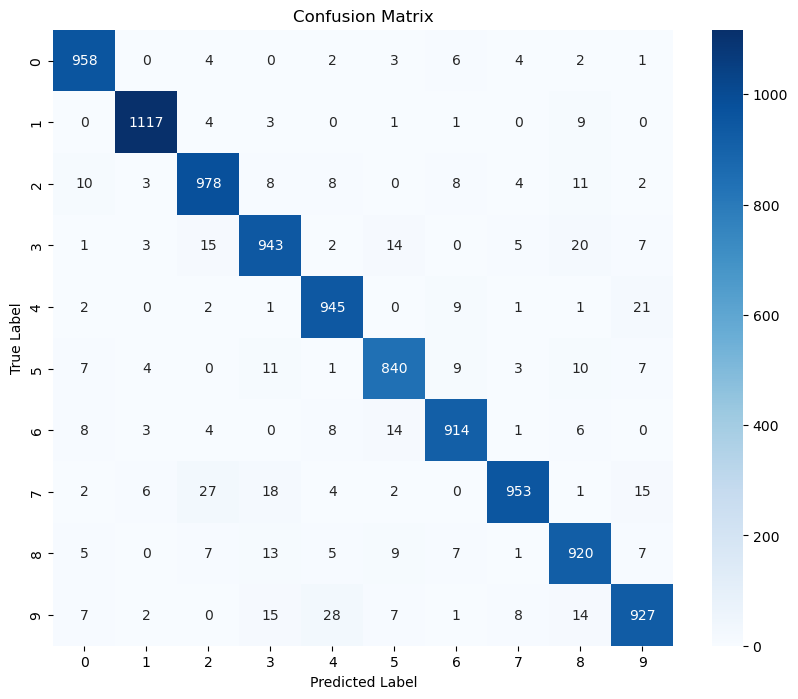

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) 

y_test_labels = np.argmax(y_test, axis=1)

print(classification_report(y_test_labels, y_pred, target_names=[str(i) for i in range(10)]))

conf_matrix = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy and Loss

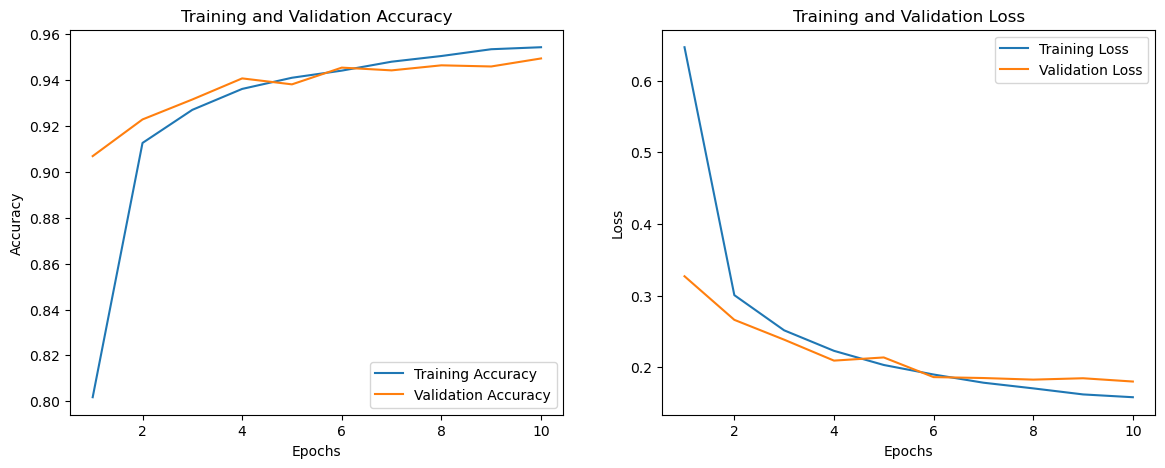

In [12]:
import matplotlib.pyplot as plt


# Plot the training and validation accuracy and loss over epochs 
epochs = range(1, len(history.history['accuracy']) + 1) 
 
# Plot accuracy 
plt.figure(figsize=(14, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy') 
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
 
# Plot loss 
plt.subplot(1, 2, 2) 
plt.plot(epochs, history.history['loss'], label='Training Loss') 
plt.plot(epochs, history.history['val_loss'], label='Validation Loss') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
 
plt.show()

Define Deep NN

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the deep neural network model 
model = Sequential([ 
    Flatten(input_shape=(28, 28)),          # Flatten the 28x28 images into 784-dimensional vectors 
    Dense(512, activation='relu'),          # First hidden layer with 512 neurons 
    Dropout(0.2),                           # Dropout layer to reduce overfitting 
    Dense(256, activation='relu'),          # Second hidden layer with 256 neurons 
    Dropout(0.2),                           # Another Dropout layer 
    Dense(128, activation='relu'),          # Third hidden layer with 128 neurons 
    Dropout(0.2),                           # Dropout to regularize the network 
    Dense(64, activation='relu'),           # Fourth hidden layer with 64 neurons 
    Dense(10, activation='softmax')         # Output layer with 10 neurons (one for each class)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Optimizer

In [14]:
# Compile the model with specified parameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy if labels are one-hot encoded
              metrics=['accuracy'])  # Track accuracy

Train model

In [15]:
# Train the model for 30 epochs with a batch size of 64
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8188 - loss: 0.5734 - val_accuracy: 0.9628 - val_loss: 0.1169
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9579 - loss: 0.1390 - val_accuracy: 0.9726 - val_loss: 0.0941
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9698 - loss: 0.1038 - val_accuracy: 0.9709 - val_loss: 0.1003
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9767 - loss: 0.0776 - val_accuracy: 0.9762 - val_loss: 0.0822
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9798 - loss: 0.0674 - val_accuracy: 0.9766 - val_loss: 0.0831
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9820 - loss: 0.0583 - val_accuracy: 0.9769 - val_loss: 0.0886
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9832 - loss: 0.0551 - val_accuracy: 0.9766 - val_loss: 0.0811
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9856 - loss: 0.0468 - val_accuracy: 0.

Performance Metrices

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



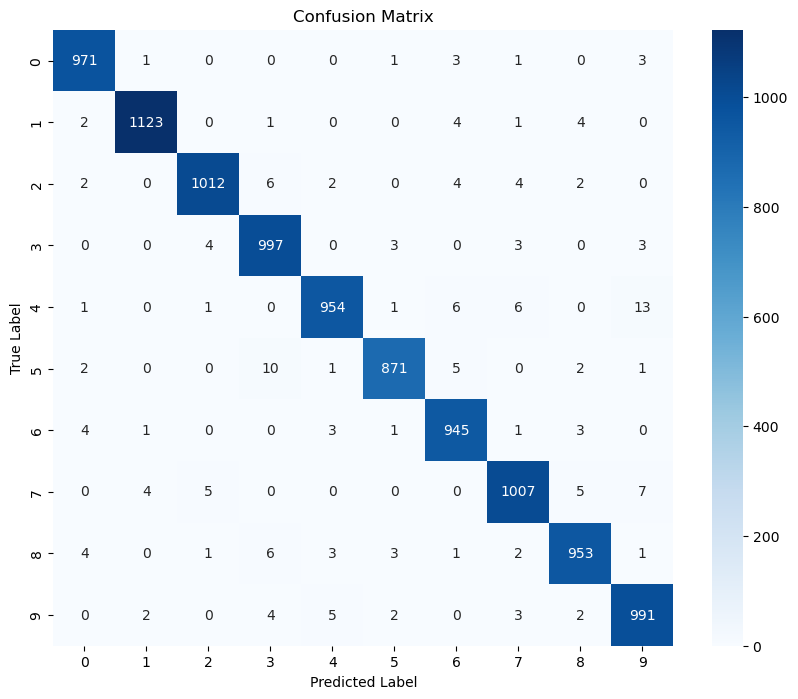

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) 

y_test_labels = np.argmax(y_test, axis=1)

print(classification_report(y_test_labels, y_pred, target_names=[str(i) for i in range(10)]))

conf_matrix = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Visualizing accuracy and loss

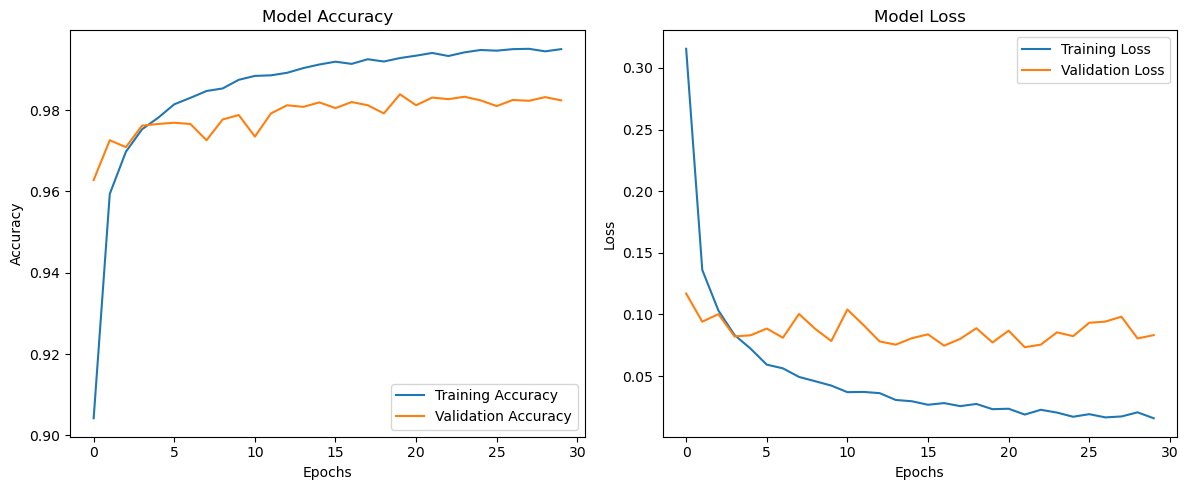

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()